# Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# TRAFFIC STOPS

In [3]:
# Read three at a time with low_memory off because of large files
stops_10 = pd.read_csv("stops_2010.csv",low_memory=False)
stops_11 = pd.read_csv("stops_2011.csv",low_memory=False)
stops_12 = pd.read_csv("stops_2012.csv",low_memory=False)

In [5]:
stops_13 = pd.read_csv("stops_2013.csv",low_memory=False)
stops_14 = pd.read_csv("stops_2014.csv",low_memory=False)
stops_15 = pd.read_csv("stops_2015.csv",low_memory=False)

In [6]:
# Condense column list to desired columns
stops_10 = stops_10[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]
stops_11 = stops_11[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]
stops_12 = stops_12[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]
stops_13 = stops_13[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]
stops_14 = stops_14[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]
stops_15 = stops_15[['id','stop_date','county_name','driver_gender','driver_race','search_conducted','contraband_found','stop_outcome','officer_id']]

# Rename columns for clarity
stops_10.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']
stops_11.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']
stops_12.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']
stops_13.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']
stops_14.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']
stops_15.columns = ['ID','Date','County','Gender','Race','Searched','Contraband','Outcome','Officer ID']

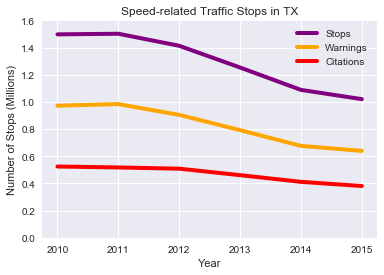

In [92]:
# Create a list of the dataframes to loop through when pulling data
stop_data = [stops_10,stops_11,stops_12,stops_13,stops_14,stops_15]

# Pull the total number of stops per year (in millions)
stop_totals = [(x["ID"].count()/1000000) for x in stop_data]

# Make a list of dataframes detailing Warnings and Citations per year
outcomes = [pd.DataFrame(x["Outcome"].value_counts()) for x in stop_data]

# Create lists of the amounts of Warnings and Citations per year
warnings = [(outcomes[x].iloc[0,0]/1000000) for x in list(np.arange(6))]
citations = [(outcomes[x].iloc[1,0]/1000000) for x in list(np.arange(6))]

# Create a list of years to use for X-axis
years = ["2010","2011","2012","2013","2014","2015"]

# Plot each set of data
sns.set()
plt.plot(years,stop_totals,linewidth=4.0,c="purple")
plt.plot(years,warnings,linewidth=4.0,c="orange")
plt.plot(years,citations,linewidth=4.0,c="red")

# Set the Y axis
plt.ylim(0,1.6)

# Create a legend for the data
plt.legend(["Stops","Warnings","Citations"])

# Set Title and Axis Labels
plt.title("Speed-related Traffic Stops in TX")
plt.ylabel("Number of Stops (Millions)")
plt.xlabel("Year")

plt.savefig("Speed Stop Outcomes.png",dpi=200)
plt.show()

In [24]:
stops_10.head()

,ID,Date,County,Gender,Race,Searched,Contraband,Outcome,Officer ID
0,TX-2010-0000002,2010-01-01,Guadalupe County,F,Asian,False,False,Warning,11524
1,TX-2010-0000003,2010-01-01,Fannin County,F,White,False,False,Warning,12274
2,TX-2010-0000005,2010-01-01,Dallas County,M,Black,False,False,Citation,10795
3,TX-2010-0000007,2010-01-01,Denton County,M,White,False,False,Citation,12571
4,TX-2010-0000008,2010-01-01,Collin County,M,White,False,False,Citation,5723


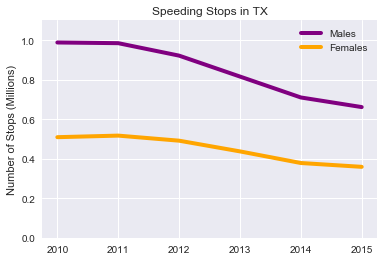

In [101]:
by_gender = [pd.DataFrame(stop_data[x]["Gender"].value_counts()) for x in list(np.arange(6))]

males = [(by_gender[x].iloc[0,0]/1000000) for x in list(np.arange(6))]
females = [(by_gender[x].iloc[1,0]/1000000) for x in list(np.arange(6))]

plt.plot(years,males,linewidth=4.0,c="purple")
plt.plot(years,females,linewidth=4.0,c="orange")

plt.ylim(0,1.1)

plt.title("Speeding Stops in TX")
plt.ylabel("Number of Stops (Millions)")
plt.legend(["Males","Females"])

plt.savefig("Speed Stops by Gender.png",dpi=200)
plt.show()

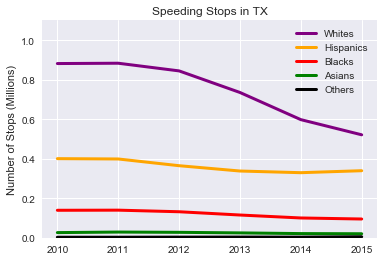

In [102]:
by_race = [pd.DataFrame(stop_data[x]["Race"].value_counts()) for x in list(np.arange(6))]

whites = [(by_race[x].iloc[0,0]/1000000) for x in list(np.arange(6))]
hispanics = [(by_race[x].iloc[1,0]/1000000) for x in list(np.arange(6))]
blacks = [(by_race[x].iloc[2,0]/1000000) for x in list(np.arange(6))]
asians  = [(by_race[x].iloc[3,0]/1000000) for x in list(np.arange(6))]
others  = [(by_race[x].iloc[4,0]/1000000) for x in list(np.arange(6))]

plt.plot(years,whites,linewidth=3.0,c="purple")
plt.plot(years,hispanics,linewidth=3.0,c="orange")
plt.plot(years,blacks,linewidth=3.0,c="red")
plt.plot(years,asians,linewidth=3.0,c="green")
plt.plot(years,others,linewidth=3.0,c="black")

plt.ylim(0,1.1)

plt.title("Speeding Stops in TX")
plt.ylabel("Number of Stops (Millions)")
plt.legend(["Whites","Hispanics","Blacks","Asians","Others"])

plt.savefig("Speed Stops by Race.png",dpi=200)
plt.show()

# CRASHES

In [8]:
# Read individual CSVs
crash_10 = pd.read_csv("crash_2010.csv",low_memory=False)
crash_11 = pd.read_csv("crash_2011.csv",low_memory=False)
crash_12 = pd.read_csv("crash_2012.csv",low_memory=False)
crash_13 = pd.read_csv("crash_2013.csv",low_memory=False)
crash_14 = pd.read_csv("crash_2014.csv",low_memory=False)
crash_15 = pd.read_csv("crash_2015.csv",low_memory=False)

In [20]:
# Append the lists into one central dataframe
crash_1011 = crash_10.append(crash_11)
crash_1213 = crash_12.append(crash_13)
crash_1415 = crash_14.append(crash_15)

crash_1013 = crash_1011.append(crash_1213)
crash_data = crash_1013.append(crash_1415)

In [21]:
# Remove unnecessary columns / rename for brevity
crash_data = crash_data[['Crash ID', 'County', 'Crash Death Count', 'Crash Severity', 'Crash Total Injury Count', 'Crash Year',
                 'Manner of Collision', 'Population Group', 'Speed Limit', 'Weather Condition', 'Vehicle Color', 
                 'Person Age', 'Person Ethnicity', 'Person Gender', 'Person Type']]
crash_data.columns = ['Crash ID', 'County', 'Deaths', 'Severity', 'Injuries', 'Year', 'Manner of Collision', 'Population Bin', 
                    'Speed Limit', 'Weather', 'Vehicle Color', 'Age', 'Race', 'Gender', 'Seat']

In [98]:
drivers = crash_data.loc[crash_data["Seat"]=="Driver"]

drivers_by_year = drivers.groupby("Year")
driver_genders = pd.DataFrame(drivers_by_year["Gender"].value_counts())

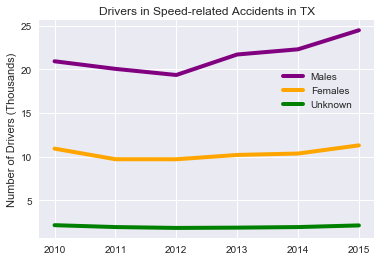

In [103]:
male_drivers = [(driver_genders.iloc[x,0]/1000) for x in list(np.arange(0,24,4))]
female_drivers = [(driver_genders.iloc[x,0]/1000) for x in list(np.arange(1,24,4))]
unknown_drivers = [((driver_genders.iloc[x,0]/1000) + (driver_genders.iloc[(x+1),0]/1000)) for x in list(np.arange(2,24,4))]

plt.plot(years,male_drivers,linewidth=4.0,c="purple")
plt.plot(years,female_drivers,linewidth=4.0,c="orange")
plt.plot(years,unknown_drivers,linewidth=4.0,c="green")

plt.title("Drivers in Speed-related Accidents in TX")
plt.ylabel("Number of Drivers (Thousands)")
plt.legend(["Males","Females","Unknown"],bbox_to_anchor=(0.7,0.55))

plt.savefig("Speed-related Crashes by Gender.png",dpi=200)
plt.show()

In [11]:
# Find the number of total crashes per year
by_year = crash_data.groupby(crash_data["Year"])

# Create a dataframe with one entry per crash
per_crash = crash_data.drop_duplicates("Crash ID")

# Group the datagrame by year
per_crash_by_year = per_crash.groupby("Year")

# Pull the total number of crashes per year
crashes_per_year = pd.DataFrame(by_year["Crash ID"].unique())
crashes_per_year["Crashes"] = [len(x) for x in crashes_per_year["Crash ID"]]
crashes_per_year.reset_index(inplace=True)
crashes_per_year = crashes_per_year[["Year","Crashes"]]

In [12]:
# Pull the total number of victims per year
crash_victims_per_year = pd.DataFrame(crash_data["Year"].value_counts())
crash_victims_per_year.reset_index(inplace=True)
crash_victims_per_year.columns = ["Year","Victims"]
crash_victims_per_year.sort_values("Year")

# Combine Crashes and Victims into same dataframe
totals_per_year = crash_victims_per_year.merge(crashes_per_year,on="Year")
totals_per_year = totals_per_year[["Year","Crashes","Victims"]]
totals_per_year.sort_values("Year",inplace=True)
totals_per_year.reset_index(drop=True,inplace=True)

In [13]:
# Pull total injuries / deaths per crash per year
injuries = pd.DataFrame(per_crash_by_year["Injuries"].sum())
injuries.reset_index(inplace=True)
deaths = pd.DataFrame(per_crash_by_year["Deaths"].sum())
deaths.reset_index(inplace=True)

# Combine Injuries/Deaths with Crashes/Victims
injured = injuries.merge(deaths,on="Year")
totals = totals_per_year.merge(injured,on="Year")

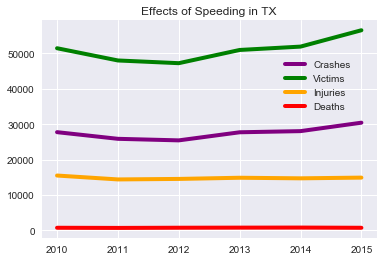

In [95]:
# Plot the four data sets
plt.plot(totals["Year"],totals["Crashes"],linewidth=4.0,c="purple")
plt.plot(totals["Year"],totals["Victims"],linewidth=4.0,c="green")
plt.plot(totals["Year"],totals["Injuries"],linewidth=4.0,c="orange")
plt.plot(totals["Year"],totals["Deaths"],linewidth=4.0,c="red")
plt.title("Effects of Speeding in TX")
plt.legend(bbox_to_anchor=(0.7,0.7))
plt.savefig("Speed-related Crashes by Outcome.png",dpi=200)
plt.show()